In [1]:
import pandas as pd

In [2]:
psql_datapath=str('/data/projects/sec/drop3/data/2.postgresql/')

In [3]:
events = pd.read_csv(psql_datapath + 'e69_peaksum.csv')

In [4]:
print("Shape of data{}".format(events.shape))
events.head()

Shape of data(1731, 15)


,a,ac_doy_sum_peak,ac_week_sum_peak,ac_month_sum_peak,ad_doy_sum_peak,ad_week_sum_peak,ad_month_sum_peak,ae_doy_sum_peak,ae_week_sum_peak,ae_month_sum_peak,af_doy_sum_peak,af_week_sum_peak,af_month_sum_peak,weekend,lift5
0,aallen,4,7,12,3,8,23,4,7,22,4,7,22,1,1
1,aasoeva,3,6,15,3,9,17,3,10,17,3,10,17,1,0
2,aault,3,8,24,3,9,30,3,9,28,3,9,28,1,1
3,aazouri,3,8,31,2,7,27,2,7,19,2,7,19,1,0
4,abaig,6,10,17,7,12,28,7,12,29,7,12,29,1,1


In [5]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   a                  1731 non-null   object
 1   ac_doy_sum_peak    1731 non-null   int64 
 2   ac_week_sum_peak   1731 non-null   int64 
 3   ac_month_sum_peak  1731 non-null   int64 
 4   ad_doy_sum_peak    1731 non-null   int64 
 5   ad_week_sum_peak   1731 non-null   int64 
 6   ad_month_sum_peak  1731 non-null   int64 
 7   ae_doy_sum_peak    1731 non-null   int64 
 8   ae_week_sum_peak   1731 non-null   int64 
 9   ae_month_sum_peak  1731 non-null   int64 
 10  af_doy_sum_peak    1731 non-null   int64 
 11  af_week_sum_peak   1731 non-null   int64 
 12  af_month_sum_peak  1731 non-null   int64 
 13  weekend            1731 non-null   int64 
 14  lift5              1731 non-null   int64 
dtypes: int64(14), object(1)
memory usage: 203.0+ KB


In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
corr = events.corr()

<AxesSubplot:>

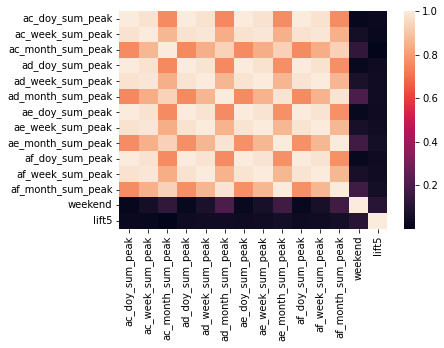

In [9]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [10]:
from pycaret.classification import *
s = setup(events, target = 'lift5')

,Description,Value
0,Session id,2043
1,Target,lift5
2,Target type,Binary
3,Original data shape,"(1731, 15)"
4,Transformed data shape,"(1731, 14)"
5,Transformed train set shape,"(1211, 14)"
6,Transformed test set shape,"(520, 14)"
7,Numeric features,13
8,Categorical features,1
9,Preprocess,True


In [16]:
# f1 = compare_models(sort='F1')

In [18]:
# best = compare_models()

In [19]:
# plot_model(best, plot='auc')

In [20]:
# plot_model(best, plot='confusion_matrix')

In [21]:
# plot_model(best, plot='feature')

In [22]:
# plot_model(best, plot='threshold')

In [11]:
# xgb = create_model('xgboost',ensemble=True,method='Bagging')

In [24]:
save_model(cb_tuned, 'JFCLASS_LIFT5-MODEL-CB-v1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ac_doy_sum_peak',
                                              'ac_week_sum_peak',
                                              'ac_month_sum_peak',
                                              'ad_doy_sum_peak',
                                              'ad_week_sum_peak',
                                              'ad_month_sum_peak',
                                              'ae_doy_sum_peak',
                                              'ae_week_sum_peak',
                                              'ae_month_sum_peak',
                                              'af_doy_sum_peak',
                                              'af_week_sum_peak',
                                              'af_month_sum_peak', 'weekend...
                                     transformer=LeaveOneOu

In [13]:
# xgb_tuned = tune_model(xgb, n_iter = 50)

In [14]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6557,0.5962,0.2000,0.6000,0.3000,0.1417,0.1794
1,0.6198,0.5854,0.2889,0.4815,0.3611,0.1140,0.1215
2,0.6364,0.6608,0.2444,0.5238,0.3333,0.1266,0.1440
3,0.6446,0.6091,0.1778,0.5714,0.2712,0.1150,0.1493
4,0.7025,0.6614,0.3556,0.6957,0.4706,0.2926,0.3245
5,0.6694,0.6702,0.3111,0.6087,0.4118,0.2140,0.2374
6,0.6364,0.5643,0.1778,0.5333,0.2667,0.0992,0.1256
7,0.6612,0.6579,0.2000,0.6429,0.3051,0.1561,0.2028
8,0.6364,0.6003,0.2222,0.5263,0.3125,0.1177,0.1379


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
cb_tuned = tune_model(cb, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6475,0.6035,0.1556,0.5833,0.2456,0.1069,0.1468
1,0.6364,0.5608,0.2444,0.5238,0.3333,0.1266,0.1440
2,0.6446,0.6538,0.2000,0.5625,0.2951,0.1242,0.1539
3,0.6281,0.5855,0.1111,0.5000,0.1818,0.0539,0.0796
4,0.6942,0.6974,0.3333,0.6818,0.4478,0.2693,0.3023
5,0.6446,0.6699,0.1778,0.5714,0.2712,0.1150,0.1493
6,0.6529,0.5415,0.2444,0.5789,0.3438,0.1578,0.1849
7,0.6364,0.6649,0.1778,0.5333,0.2667,0.0992,0.1256
8,0.6529,0.6132,0.2000,0.6000,0.3000,0.1401,0.1775


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [17]:
evaluate_model(cb_tuned)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

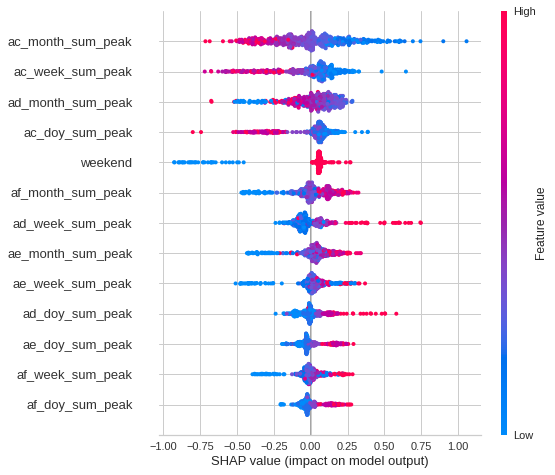

In [23]:
interpret_model(cb_tuned)